## 1. Importation des données

In [1]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import h5py

# Chargement des données

X_train = h5py.File('train.h5', 'r')
X_test = h5py.File('test.h5', 'r')
y = np.loadtxt('train_y.csv',  delimiter=',', skiprows=1, usecols=range(1, 2)).astype('int')

#print(list(X_train.keys()))
#print(list(X_test.keys()))
#print(y)

accelerometer_x_train = X_train['accelerometer_x']
accelerometer_y_train = X_train['accelerometer_y']
accelerometer_z_train = X_train['accelerometer_z']
eeg_1_train = X_train['eeg_1']
eeg_2_train = X_train['eeg_2']
eeg_3_train = X_train['eeg_3']
eeg_4_train = X_train['eeg_4']
eeg_5_train = X_train['eeg_5']
eeg_6_train = X_train['eeg_6']
eeg_7_train = X_train['eeg_7']
pulse_oximeter_infrared_train = X_train['pulse_oximeter_infrared']

accelerometer_x_test = X_test['accelerometer_x']
accelerometer_y_test = X_test['accelerometer_y']
accelerometer_z_test = X_test['accelerometer_z']
eeg_1_test = X_test['eeg_1']
eeg_2_test = X_test['eeg_2']
eeg_3_test = X_test['eeg_3']
eeg_4_test = X_test['eeg_4']
eeg_5_test = X_test['eeg_5']
eeg_6_test = X_test['eeg_6']
eeg_7_test = X_test['eeg_7']
pulse_oximeter_infrared_test = X_test['pulse_oximeter_infrared']

## 2. Visualisation des données

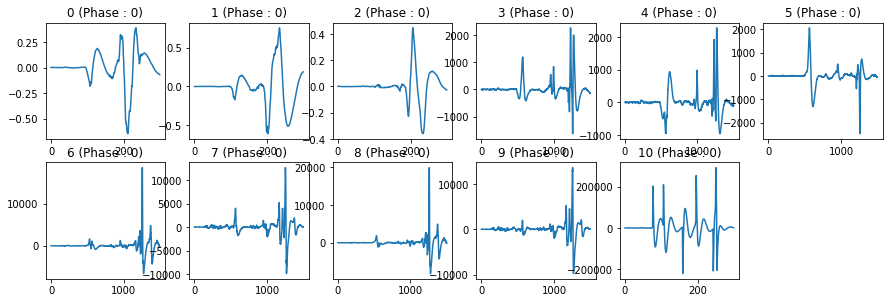

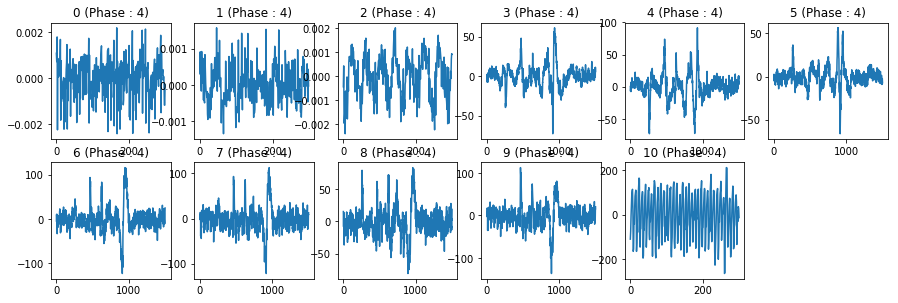

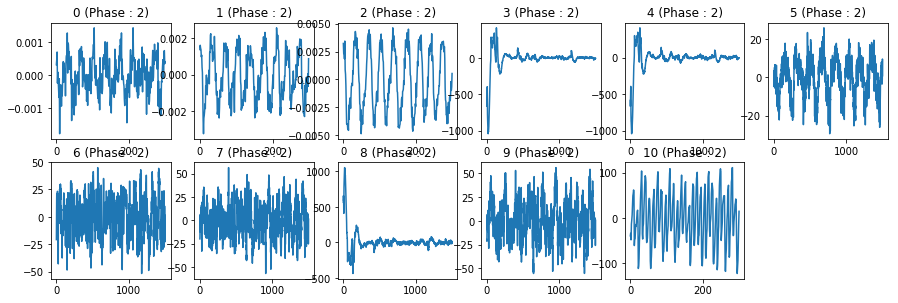

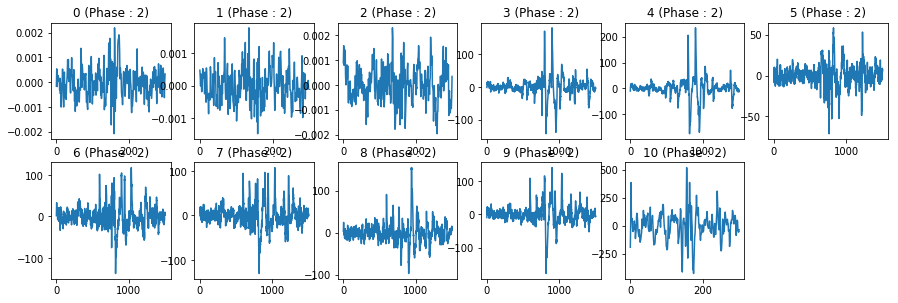

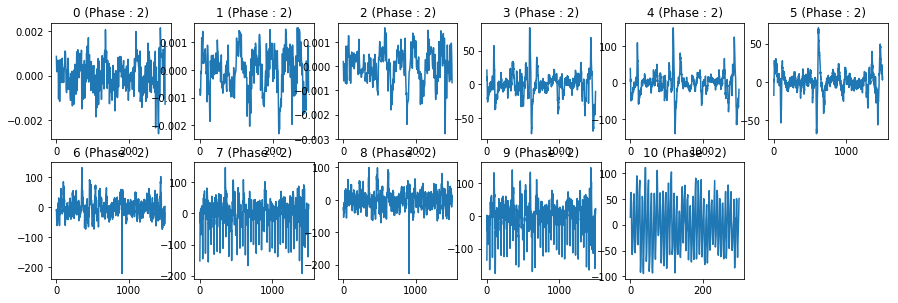

In [43]:
keys=list(X_train.keys())
for i in range(10,15):
    plt.figure(figsize=(15,15))
    for k_id in range(len(keys)):
        k=keys[k_id]
        plt.subplot(6,6,k_id+1)
        plt.plot(X_train[k][i])
        plt.title(str(k_id) + " (Phase : " + str(y[i]) + ")")

## 3. Analyse fréquentielle

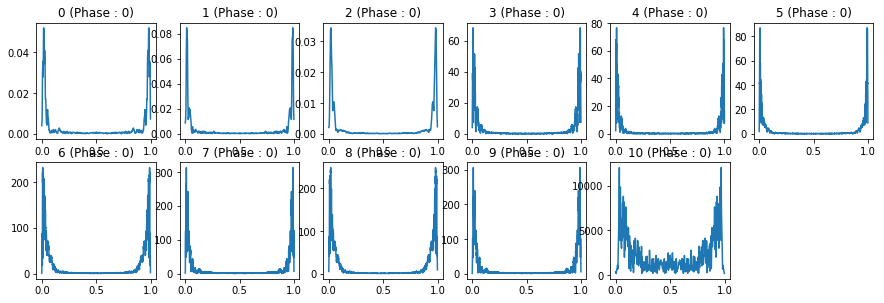

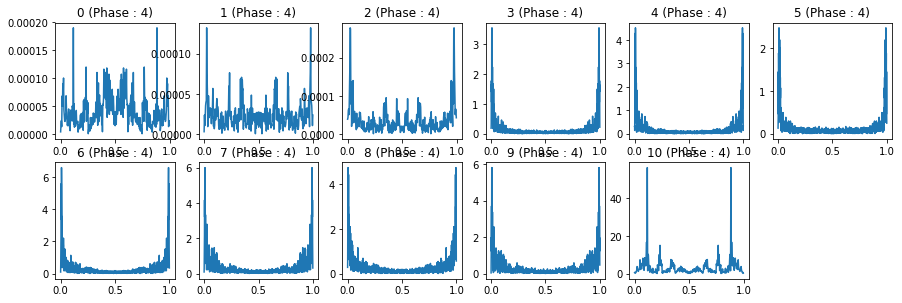

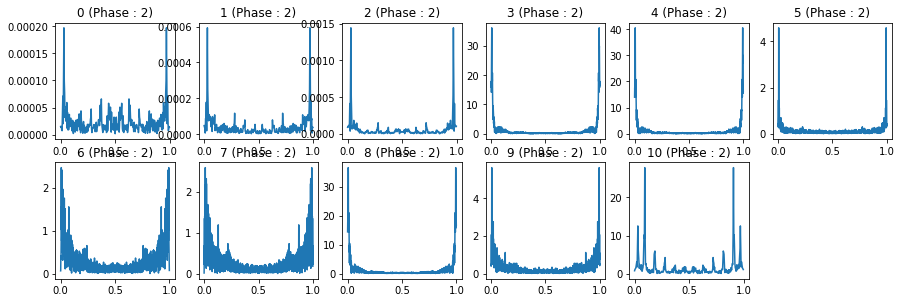

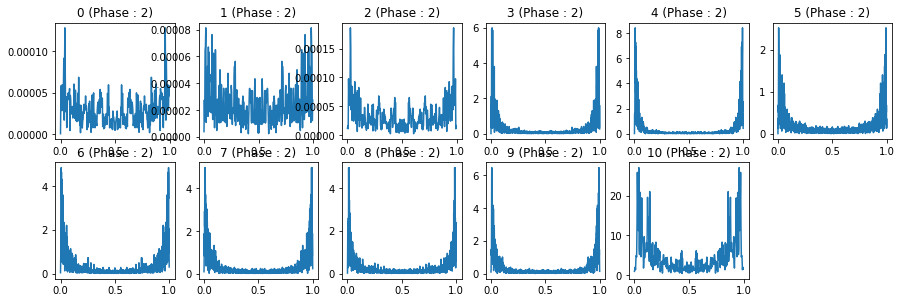

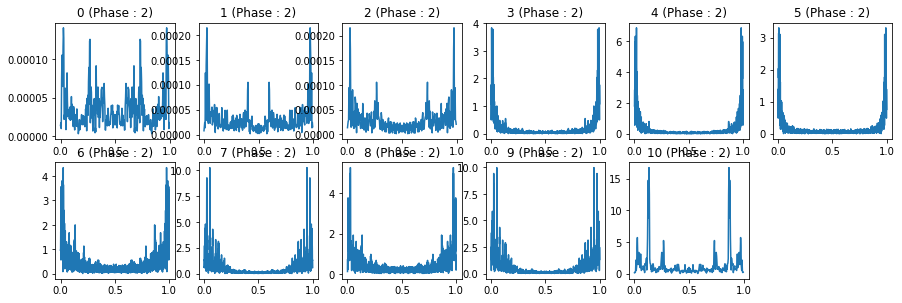

In [44]:
keys=list(X_train.keys())
for i in range(10,15):
    plt.figure(figsize=(15,15))
    for k_id in range(len(keys)):
        k=keys[k_id]
        signal=X_train[k][i]
        
        Ne = len(signal)
        Te = 1
        spectre = np.absolute(numpy.fft.fft(signal))/Ne
        frequences = np.arange(Ne,)*1.0/(Te*Ne)
        
        plt.subplot(6,6,k_id+1)
        plt.plot(frequences,spectre)
        plt.title(str(k_id) + " (Phase : " + str(y[i]) + ")")

## 3. Validation croisée

In [35]:
# Validation croisées en 10 dataset élémentaires

from sklearn import cross_validation

folds = cross_validation.StratifiedKFold(y, 10, shuffle=True)
print(folds)